# Data Investigation

The purpose of this notebook is to identify any issues with the data. I will pose a question at for each section and then hopefully answer it through tables and visualizations.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import os
from adjustText import adjust_text
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
# Load data
games = pd.read_csv("../../Data/games.csv")
players = pd.read_csv("../../Data/players.csv")
plays = pd.read_csv("../../Data/plays.csv")
tackles = pd.read_csv("../../Data/tackles.csv")
tracking_1 = pd.read_csv("../../Data/tracking_week_1.csv")
tracking_2 = pd.read_csv("../../Data/tracking_week_2.csv")
tracking_3 = pd.read_csv("../../Data/tracking_week_3.csv")
tracking_4 = pd.read_csv("../../Data/tracking_week_4.csv")
tracking_5 = pd.read_csv("../../Data/tracking_week_5.csv")
tracking_6 = pd.read_csv("../../Data/tracking_week_6.csv")
tracking_7 = pd.read_csv("../../Data/tracking_week_7.csv")
tracking_8 = pd.read_csv("../../Data/tracking_week_8.csv")
tracking_9 = pd.read_csv("../../Data/tracking_week_9.csv")

In [4]:
tracking_all = pd.concat([tracking_1,tracking_2,tracking_3,tracking_4,tracking_5,tracking_6,tracking_7,tracking_8,tracking_9], axis = 0, ignore_index = True)

In [5]:
clean_tracking = pd.read_csv("../../Data/clean_tracking.csv")

# What is the distribution of number of frames in a play for the clean tracking?

In [10]:
frame_counts = clean_tracking.groupby('gamePlayId')['frameId'].count().reset_index()
frame_counts.columns = ['gamePlayId', 'frameCount']
frame_counts["frameCount"] = frame_counts["frameCount"]/11
display(frame_counts)

,gamePlayId,frameCount
0,2022090800.0101.0,27.0
1,2022090800.01030.0,11.0
2,2022090800.01102.0,41.0
3,2022090800.01187.0,33.0
4,2022090800.0122.0,24.0
...,...,...
12464,2022110700.080.0,34.0
12465,2022110700.0839.0,36.0
12466,2022110700.0929.0,29.0
12467,2022110700.0950.0,38.0


In [12]:
frame_counts.describe()[1:]

,frameCount
mean,26.94354
std,13.98161
min,2.00000
25%,17.00000
50%,26.00000
75%,35.00000
max,140.00000


<AxesSubplot:>

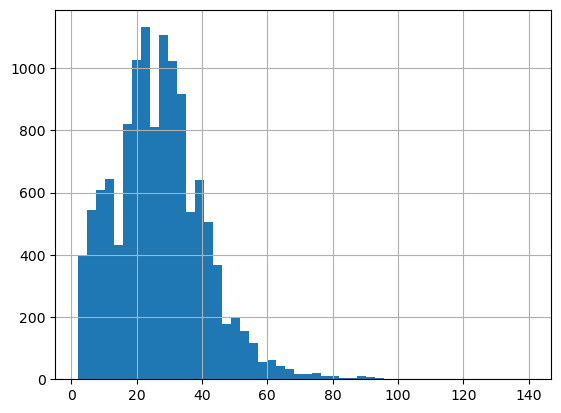

In [14]:
frame_counts["frameCount"].hist(bins = 50)

# Are there any plays with less than 11 players in the data

In [19]:
player_counts = clean_tracking.groupby(['gamePlayId','frameId'])['nflId'].count().reset_index()
player_counts.columns = ['gamePlayId', 'frameId', 'playerCount']
display(player_counts[player_counts["playerCount"] !=11])

,gamePlayId,frameId,playerCount


There are no plays were there are not 11 players on the field. This is good news as it will not be an issue for data prep.

## Why are some plays missing from the dataset? (i.e Interceptions)

I will be taking the week 1 matchup between the steelers and bengals where it seems that there are some plays missing.

In [5]:
# Identify data for week 1 matchup 
display(games[games["week"]==1]) #gameId = 2022091103

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,09/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,09/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,09/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,09/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,09/11/2022,13:00:00,WAS,JAX,28,22


In [12]:
#Filter data
pit_vs_cin_game = games[games["gameId"]==2022091103]
pit_vs_cin_plays = plays[plays["gameId"]==2022091103]
pit_vs_cin_tracking = tracking_1[tracking_1["gameId"]==2022091103]
pit_vs_cin_tackles = tackles[tackles["gameId"]==2022091103]

In [ ]:
#join tables
pit_vs_cin_tracking_plays = pd.merge(pit_vs_cin_plays, on='ID')
display(pit_vs_cin_tracking_plays)

In [21]:
display(pit_vs_cin_plays[["playId", "playDescription","quarter", "gameClock", "gameClockSeconds"]].sort_values(by=['quarter','gameClockSeconds'], ascending=[True,False]))

,playId,playDescription,quarter,gameClock,gameClockSeconds
4179,58,(15:00) (Shotgun) M.Trubisky pass short middle to P.Freiermuth to PIT 28 for 3 yards (L.Wilson).,1,15:00,900
6631,82,"(14:39) (No Huddle, Shotgun) M.Trubisky pass short right to C.Claypool ran ob at PIT 33 for 5 yards (M.Hilton).",1,14:39,879
2391,111,"(14:21) (Shotgun) M.Trubisky pass short left to D.Johnson pushed ob at PIT 34 for 1 yard (E.Apple). Pittsburgh challenged the short of the line to gain ruling, and the play was Upheld. The ruling on the field stands. (Timeout #1.)",1,14:21,861
11655,253,(12:43) (Shotgun) J.Mixon left guard to CIN 30 for 5 yards (A.Highsmith; M.Fitzpatrick).,1,12:43,763
2365,274,(12:05) (No Huddle) J.Mixon left tackle to CIN 36 for 6 yards (M.Fitzpatrick).,1,12:05,725
11412,295,"(11:34) (No Huddle, Shotgun) J.Burrow pass short right to T.Boyd to CIN 39 for 3 yards (M.Jack; A.Witherspoon).",1,11:34,694
10328,319,"(10:55) (No Huddle) J.Mixon left end to CIN 39 for no gain (A.Maulet, D.Bush).",1,10:55,655
5309,340,"(10:13) (Shotgun) J.Burrow pass short left to H.Hurst to CIN 48 for 9 yards (R.Spillane, L.Wallace).",1,10:13,613
7217,364,(9:34) (Shotgun) J.Burrow pass short middle to T.Higgins to PIT 34 for 18 yards (C.Sutton) [A.Highsmith].,1,9:34,574
5819,388,(8:57) (Shotgun) J.Burrow pass short right to J.Mixon to PIT 34 for no gain (A.Witherspoon).,1,8:57,537


In [24]:
print("Number of distinct plays in plays data:", len(pit_vs_cin_plays))
print("Number of distinct plays in tracking data:", len(pit_vs_cin_tracking["playId"].unique()))

Number of distinct plays in plays data: 102
Number of distinct plays in tracking data: 102


## It seems that we are missing sacks, let us identify the plays that are tagged as "sack" in the events of the tracking data


In [28]:
#Identify tracking rows with qb_sack
qb_sack = tracking_1[tracking_1["event"]=="qb_sack"]
print(len(qb_sack))

23


In [29]:
display(qb_sack)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
355882,2022091102,3449,38868.0,Tashaun Gipson,50,2022-09-11 15:36:35.099999,31.0,SF,left,19.55,5.70,1.44,4.31,0.15,15.51,249.94,qb_sack
355946,2022091102,3449,42360.0,Arik Armstead,50,2022-09-11 15:36:35.099999,91.0,SF,left,16.56,28.68,1.68,0.21,0.17,129.31,244.95,qb_sack
356010,2022091102,3449,43345.0,Cody Whitehair,50,2022-09-11 15:36:35.099999,65.0,CHI,left,20.22,24.70,3.60,1.07,0.37,200.95,182.27,qb_sack
356074,2022091102,3449,44938.0,Samson Ebukam,50,2022-09-11 15:36:35.099999,56.0,SF,left,21.26,19.54,5.15,2.03,0.53,175.52,183.94,qb_sack
356138,2022091102,3449,46113.0,Dante Pettis,50,2022-09-11 15:36:35.099999,18.0,CHI,left,6.78,2.30,1.18,2.27,0.12,285.71,210.10,qb_sack
356202,2022091102,3449,46139.0,Fred Warner,50,2022-09-11 15:36:35.099999,54.0,SF,left,21.74,11.27,2.30,3.67,0.21,331.24,318.46,qb_sack
356266,2022091102,3449,46276.0,Equanimeous St. Brown,50,2022-09-11 15:36:35.099999,19.0,CHI,left,11.23,43.54,4.34,1.34,0.43,207.70,176.02,qb_sack
356330,2022091102,3449,46354.0,Emmanuel Moseley,50,2022-09-11 15:36:35.099999,4.0,SF,left,6.38,2.46,2.08,2.98,0.22,131.25,227.06,qb_sack
356394,2022091102,3449,46757.0,Charvarius Ward,50,2022-09-11 15:36:35.099999,7.0,SF,left,9.89,45.92,3.36,1.86,0.33,180.07,180.79,qb_sack
356458,2022091102,3449,47785.0,Nick Bosa,50,2022-09-11 15:36:35.099999,97.0,SF,left,21.88,20.84,5.37,2.55,0.57,170.84,200.21,qb_sack


# How many plays are there with multiple tackles? What does this data look like

In [6]:
#join the plays and tackling data
plays_tackling = pd.merge(plays,tackles,on = ["gameId", "playId"])

In [10]:
display(plays_tackling[["gameId", "playId", "ballCarrierDisplayName", "nflId", "tackle","assist","forcedFumble", "pff_missedTackle"]])

,gameId,playId,ballCarrierDisplayName,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022100908,3537,Parker Hesse,43306,1,0,0,0
1,2022091103,3126,Chase Claypool,44872,1,0,0,0
2,2022091103,3126,Chase Claypool,47855,0,0,0,1
3,2022091111,1148,Darren Waller,47843,1,0,0,0
4,2022100212,2007,Mike Boone,53509,0,1,0,0
...,...,...,...,...,...,...,...,...
17421,2022101605,3371,Joe Mixon,41257,0,0,0,1
17422,2022100207,2777,Jonathan Taylor,47971,1,0,0,0
17423,2022100207,2777,Jonathan Taylor,43388,0,1,0,0
17424,2022102308,905,Dameon Pierce,42391,0,1,0,0


In [14]:
#group tackles, assists, pff_missedTackle by plya
# Group by 'gameId' and 'playId' and calculate the sum for each group
grouped_tackles = plays_tackling.groupby(['gameId', 'playId', 'ballCarrierDisplayName']).agg({
    'tackle': 'sum',
    'assist': 'sum',
    'pff_missedTackle': 'sum'
}).reset_index()

# 'reset_index()' is used to convert the groupby result back to a DataFrame with a default integer index

# Display the resulting DataFrame
print(grouped_tackles)

           gameId  playId ballCarrierDisplayName  tackle  assist  \
0      2022090800      56           Stefon Diggs       1       0   
1      2022090800      80             Josh Allen       1       0   
2      2022090800     101       Devin Singletary       1       0   
3      2022090800     122       Devin Singletary       1       0   
4      2022090800     146       Devin Singletary       0       2   
...           ...     ...                    ...     ...     ...   
12020  2022110700    3658           Kenyan Drake       1       0   
12021  2022110700    3686           Kenyan Drake       1       0   
12022  2022110700    3707           Kenyan Drake       1       0   
12023  2022110700    3740           Kenyan Drake       1       0   
12024  2022110700    3787      Dwayne Washington       1       0   

       pff_missedTackle  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1

In [17]:
grouped_tackles["tackle"].value_counts(dropna = False)

1    9917
0    2107
2       1
Name: tackle, dtype: int64

In [18]:
grouped_tackles["assist"].value_counts(dropna = False)

0    8535
2    2004
1    1486
Name: assist, dtype: int64

In [20]:
grouped_tackles["pff_missedTackle"].value_counts(dropna = False)

0    10248
1     1509
2      232
3       30
4        4
6        1
5        1
Name: pff_missedTackle, dtype: int64

# What players have the most broken tackles?

In [32]:
grouped_missed = plays_tackling[plays_tackling["pff_missedTackle"]>0].groupby(['ballCarrierDisplayName']).agg({
    'pff_missedTackle': 'sum'
}).reset_index()

In [39]:
ordered_grouped_missed = grouped_missed.sort_values(by = "pff_missedTackle",ascending=False)
display(ordered_grouped_missed)

,ballCarrierDisplayName,pff_missedTackle
72,Dameon Pierce,56
177,Josh Jacobs,55
246,Nick Chubb,53
3,Aaron Jones,41
19,Austin Ekeler,40
...,...,...
198,Kenny Golladay,1
56,Connor Heyward,1
249,Noah Gray,1
248,Noah Fant,1


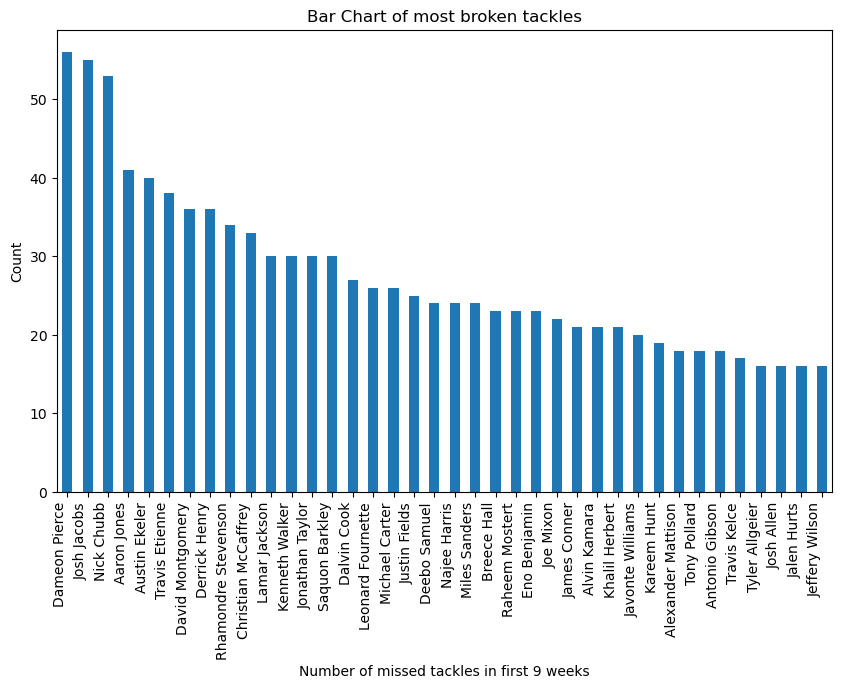

In [41]:
plt.figure(figsize=(10, 6))
ordered_grouped_missed[ordered_grouped_missed["pff_missedTackle"]>15]["pff_missedTackle"].plot(kind='bar') 
plt.xticks(range(len(ordered_grouped_missed[ordered_grouped_missed["pff_missedTackle"]>15]["pff_missedTackle"])), ordered_grouped_missed[ordered_grouped_missed["pff_missedTackle"]>15]["ballCarrierDisplayName"], rotation=90, ha='right')
plt.title(f'Bar Chart of most broken tackles')
plt.xlabel("Number of missed tackles in first 9 weeks")
plt.ylabel('Count')
plt.show()

# What play has two tackles awarded

In [22]:
grouped_tackles[grouped_tackles["tackle"]>1]

,gameId,playId,ballCarrierDisplayName,tackle,assist,pff_missedTackle
774,2022091107,1879,Tyler Conklin,2,1,0


In [23]:
plays_tackling[(plays_tackling["gameId"] == 2022091107) &(plays_tackling["playId"]==1879)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,foulName1,foulName2,foulNFLId1,foulNFLId2,gameClockSeconds,nflId,tackle,assist,forcedFumble,pff_missedTackle
5614,2022091107,1879,46226,Tyler Conklin,(1:16) (Shotgun) J.Flacco pass short right to ...,2,3,5,NYJ,BAL,...,NaN,NaN,NaN,NaN,76,44854,1,0,0,0
5615,2022091107,1879,46226,Tyler Conklin,(1:16) (Shotgun) J.Flacco pass short right to ...,2,3,5,NYJ,BAL,...,NaN,NaN,NaN,NaN,76,54479,1,0,0,0
5616,2022091107,1879,46226,Tyler Conklin,(1:16) (Shotgun) J.Flacco pass short right to ...,2,3,5,NYJ,BAL,...,NaN,NaN,NaN,NaN,76,43694,0,1,1,0


# Is there tracking once the play is over or the tackle has occured?

In [43]:
display(tracking_all)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN


# How many plays do not have information about the ball being snapped

In [54]:
#Define start_events
start_events = ['ball_snap', 'snap_direct', 'autoevent_ballsnap']

# Find all plays that contain the 'snap' event
snap_events = tracking_all[tracking_all['event'].isin(start_events)]

# Find unique game and play IDs that have a 'snap' event
plays_with_snap = snap_events[['gameId', 'playId']].drop_duplicates()

# Find all unique plays in the dataset
all_plays = tracking_all[['gameId', 'playId']].drop_duplicates()

# Determine which plays do not have a 'snap' event by using an outer join and filtering for NaN on the snap side
plays_without_snap = pd.merge(all_plays, plays_with_snap, on=['gameId', 'playId'], how='left', indicator=True)
plays_without_snap = plays_without_snap[plays_without_snap['_merge'] == 'left_only']


# Count how many unique plays do not have a 'snap' event
num_plays_without_snap = len(plays_without_snap)

# Get the total number of unique plays
total_unique_plays = len(all_plays)

# Calculate the percentage of plays without a 'snap' event
percentage_without_snap = (num_plays_without_snap / total_unique_plays) * 100

print(f"Percentage of plays without a 'ball_snap' event: {percentage_without_snap:.2f}%")

Percentage of plays without a 'ball_snap' event: 48.89%


# Are there any plays where ball_snap shows up more than once in a play?

In [18]:
# Filter the DataFrame for 'ball_snap' events
ball_snap_events = tracking_all[(tracking_all['event'] == 'ball_snap') & (tracking_all["displayName"]=="football")]

# Group by 'gameId' and 'playId' and count the occurrences of 'ball_snap' events
snap_counts = ball_snap_events.groupby(['gameId', 'playId']).size()

# Filter the plays where 'ball_snap' occurs more than once
multiple_snaps = snap_counts[snap_counts > 1].reset_index(name='snap_count')

if not multiple_snaps.empty:
    print(f"There are plays with multiple 'ball_snap' events:")
    print(len(set(multiple_snaps["playId"])))
else:
    print("No plays have multiple 'ball_snap' events.")


No plays have multiple 'ball_snap' events.


# How many plays have snap_direct and what does this look like

In [21]:
# Filter the DataFrame for rows where 'event' is equal to 'snap_direct'
snap_direct_plays = tracking_all[(tracking_all['event'] == 'snap_direct') & (tracking_all["displayName"] == "football")]

# If you want to see the unique plays, you can drop duplicates based on 'gameId' and 'playId'
unique_snap_direct_plays = snap_direct_plays[['gameId', 'playId']].drop_duplicates()

# Output the result as a DataFrame
print("Number of Plays with 'snap_direct' events:")
print(len(unique_snap_direct_plays))

Number of Plays with 'snap_direct' events:
50


In [28]:
i = 4
display(tracking_all[(tracking_all["gameId"]==unique_snap_direct_plays.iloc[i]["gameId"]) & 
                     (tracking_all["playId"]==unique_snap_direct_plays.iloc[i]["playId"]) &
                     (tracking_all["displayName"]=="football")])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1939441,2022091805,580,NaN,football,1,2022-09-18 13:21:43.400000,NaN,football,right,104.699997,29.680000,0.00,0.00,0.00,NaN,NaN,NaN
1939442,2022091805,580,NaN,football,2,2022-09-18 13:21:43.500000,NaN,football,right,104.699997,29.680000,0.00,0.00,0.00,NaN,NaN,NaN
1939443,2022091805,580,NaN,football,3,2022-09-18 13:21:43.599999,NaN,football,right,104.699997,29.680000,0.00,0.00,0.00,NaN,NaN,NaN
1939444,2022091805,580,NaN,football,4,2022-09-18 13:21:43.700000,NaN,football,right,104.680000,29.680000,0.00,0.00,0.02,NaN,NaN,NaN
1939445,2022091805,580,NaN,football,5,2022-09-18 13:21:43.799999,NaN,football,right,104.650002,29.670000,0.00,0.00,0.03,NaN,NaN,NaN
1939446,2022091805,580,NaN,football,6,2022-09-18 13:21:43.900000,NaN,football,right,104.639999,29.670000,0.00,0.00,0.01,NaN,NaN,snap_direct
1939447,2022091805,580,NaN,football,7,2022-09-18 13:21:44.000000,NaN,football,right,104.610001,29.670000,0.00,0.00,0.03,NaN,NaN,NaN
1939448,2022091805,580,NaN,football,8,2022-09-18 13:21:44.099999,NaN,football,right,104.610001,29.670000,0.00,0.00,0.00,NaN,NaN,NaN
1939449,2022091805,580,NaN,football,9,2022-09-18 13:21:44.200000,NaN,football,right,104.529999,29.670000,0.01,0.00,0.08,NaN,NaN,NaN
1939450,2022091805,580,NaN,football,10,2022-09-18 13:21:44.299999,NaN,football,right,104.510002,29.660000,0.11,2.60,0.02,NaN,NaN,NaN


# What happens on a play when there is a fumble

In [31]:
# Filter the DataFrame for rows where 'event' is equal to 'snap_direct'
fumble_plays = tracking_all[(tracking_all['event'] == 'fumble') & (tracking_all["displayName"] == "football")]

# If you want to see the unique plays, you can drop duplicates based on 'gameId' and 'playId'
unique_fumble_plays = fumble_plays[['gameId', 'playId']].drop_duplicates()

# Output the result as a DataFrame
print("Number of Plays with 'fumble' events:")
print(len(fumble_plays))

Number of Plays with 'fumble' events:
105


In [32]:
i = 4
display(tracking_all[(tracking_all["gameId"]==unique_fumble_plays.iloc[i]["gameId"]) & 
                     (tracking_all["playId"]==unique_fumble_plays.iloc[i]["playId"]) &
                     (tracking_all["displayName"]=="football")])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
145019,2022091100,2683,NaN,football,1,2022-09-11 15:06:52.799999,NaN,football,right,88.809998,24.230000,3.39,3.43,0.32,NaN,NaN,NaN
145020,2022091100,2683,NaN,football,2,2022-09-11 15:06:52.900000,NaN,football,right,88.809998,24.600000,3.92,3.63,0.38,NaN,NaN,NaN
145021,2022091100,2683,NaN,football,3,2022-09-11 15:06:53.000000,NaN,football,right,88.849998,25.010000,4.25,3.65,0.41,NaN,NaN,NaN
145022,2022091100,2683,NaN,football,4,2022-09-11 15:06:53.099999,NaN,football,right,88.940002,25.450001,4.63,4.08,0.45,NaN,NaN,NaN
145023,2022091100,2683,NaN,football,5,2022-09-11 15:06:53.200000,NaN,football,right,89.070000,25.910000,4.89,3.32,0.48,NaN,NaN,NaN
145024,2022091100,2683,NaN,football,6,2022-09-11 15:06:53.299999,NaN,football,right,89.239998,26.379999,5.14,2.88,0.51,NaN,NaN,run
145025,2022091100,2683,NaN,football,7,2022-09-11 15:06:53.400000,NaN,football,right,89.470001,26.959999,5.97,3.86,0.62,NaN,NaN,NaN
145026,2022091100,2683,NaN,football,8,2022-09-11 15:06:53.500000,NaN,football,right,89.730003,27.520000,6.34,3.26,0.62,NaN,NaN,NaN
145027,2022091100,2683,NaN,football,9,2022-09-11 15:06:53.599999,NaN,football,right,90.010002,28.100000,6.58,2.71,0.64,NaN,NaN,NaN
145028,2022091100,2683,NaN,football,10,2022-09-11 15:06:53.700000,NaN,football,right,90.330002,28.709999,6.87,2.08,0.68,NaN,NaN,NaN


In [41]:
#Lets look at the tackle data as well
i = 3
display(tackles[(tackles["gameId"]==unique_fumble_plays.iloc[i]["gameId"]) & 
                     (tackles["playId"]==unique_fumble_plays.iloc[i]["playId"])])

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
3415,2022091100,2555,52542,1,0,0,0
11468,2022091100,2555,52527,0,1,1,0


# What do plays with autoevent_ballsnap look like and how many are there?

In [50]:
# Filter the DataFrame for rows where 'event' is equal to 'snap_direct'
autoevent_ballsnap_plays = tracking_all[(tracking_all['event'] == 'autoevent_ballsnap') & (tracking_all["displayName"] == "football")]

# If you want to see the unique plays, you can drop duplicates based on 'gameId' and 'playId'
unique_autoevent_ballsnap_plays = autoevent_ballsnap_plays[['gameId', 'playId']].drop_duplicates()

# Output the result as a DataFrame
print("Number of Plays with 'fumble' events:")
print(len(unique_autoevent_ballsnap_plays))

Number of Plays with 'fumble' events:
30


In [52]:
i = 5
display(tracking_all[(tracking_all["gameId"]==unique_autoevent_ballsnap_plays.iloc[i]["gameId"]) & 
                     (tracking_all["playId"]==unique_autoevent_ballsnap_plays.iloc[i]["playId"]) &
                     (tracking_all["displayName"]=="football")])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1182541,2022091112,1144,NaN,football,1,2022-09-11 17:20:06.000000,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,NaN
1182542,2022091112,1144,NaN,football,2,2022-09-11 17:20:06.099999,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,NaN
1182543,2022091112,1144,NaN,football,3,2022-09-11 17:20:06.200000,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,NaN
1182544,2022091112,1144,NaN,football,4,2022-09-11 17:20:06.299999,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,NaN
1182545,2022091112,1144,NaN,football,5,2022-09-11 17:20:06.400000,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,NaN
1182546,2022091112,1144,NaN,football,6,2022-09-11 17:20:06.500000,NaN,football,left,109.209999,26.840000,0.00,0.00,0.00,NaN,NaN,autoevent_ballsnap
1182547,2022091112,1144,NaN,football,7,2022-09-11 17:20:06.599999,NaN,football,left,109.599998,27.240000,3.83,0.21,0.56,NaN,NaN,NaN
1182548,2022091112,1144,NaN,football,8,2022-09-11 17:20:06.700000,NaN,football,left,109.959999,27.230000,3.82,0.63,0.36,NaN,NaN,NaN
1182549,2022091112,1144,NaN,football,9,2022-09-11 17:20:06.799999,NaN,football,left,110.349998,27.240000,3.77,1.03,0.39,NaN,NaN,NaN
1182550,2022091112,1144,NaN,football,10,2022-09-11 17:20:06.900000,NaN,football,left,110.730003,27.250000,3.71,1.30,0.37,NaN,NaN,NaN


# When a player goes out of bounds is there a tackle that is always occurs?

In [4]:
out_of_bounds_plays = tracking_all[tracking_all["event"]=="out_of_bounds"]

tackles_out_of_bounds_plays = pd.merge(out_of_bounds_plays,tackles, how = "left", on = ["gameId","playId","nflId"])

display(tackles_out_of_bounds_plays)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,364,34452.0,Matthew Stafford,8,2022-09-08 20:35:18.099999,9.0,LA,right,24.500000,14.81,4.79,1.53,0.48,160.88,164.70,out_of_bounds,NaN,NaN,NaN,NaN
1,2022090800,364,37075.0,Von Miller,8,2022-09-08 20:35:18.099999,40.0,BUF,right,28.400000,34.04,3.63,0.78,0.37,106.15,118.44,out_of_bounds,NaN,NaN,NaN,NaN
2,2022090800,364,40107.0,Micah Hyde,8,2022-09-08 20:35:18.099999,23.0,BUF,right,51.600000,20.00,5.44,1.84,0.55,132.56,125.35,out_of_bounds,NaN,NaN,NaN,NaN
3,2022090800,364,40166.0,Jordan Poyer,8,2022-09-08 20:35:18.099999,21.0,BUF,right,53.870000,2.07,6.99,3.62,0.72,172.89,173.56,out_of_bounds,1.0,0.0,0.0,0.0
4,2022090800,364,41290.0,Allen Robinson,8,2022-09-08 20:35:18.099999,1.0,LA,right,41.640000,49.17,0.86,1.46,0.08,175.25,206.27,out_of_bounds,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41624,2022110700,3429,53460.0,Odafe Oweh,41,2022-11-07 22:50:45.900000,99.0,BAL,right,50.570000,20.98,3.25,0.40,0.33,104.93,108.51,out_of_bounds,NaN,NaN,NaN,NaN
41625,2022110700,3429,53635.0,Landon Young,41,2022-11-07 22:50:45.900000,67.0,NO,right,42.880000,26.57,1.42,0.35,0.15,101.30,143.22,out_of_bounds,NaN,NaN,NaN,NaN
41626,2022110700,3429,54476.0,Chris Olave,41,2022-11-07 22:50:45.900000,12.0,NO,right,64.050000,43.33,1.35,0.21,0.13,183.02,192.76,out_of_bounds,NaN,NaN,NaN,NaN
41627,2022110700,3429,54606.0,Damarion Williams,41,2022-11-07 22:50:45.900000,22.0,BAL,right,71.260000,11.73,5.37,3.17,0.55,156.52,144.53,out_of_bounds,NaN,NaN,NaN,NaN


In [37]:
#give me all the plays where out_of_bounds was the event
OOB_plays = tackles_out_of_bounds_plays[tackles_out_of_bounds_plays["event"]=="out_of_bounds"][["gameId","playId"]].drop_duplicates()
print(f"number of plays with OOB:{len(OOB_plays)}")
#merge with tackles to see if there is a tackle or assist associate with each play
tackles_OOB_plays = tackles.merge(OOB_plays, on = ["gameId","playId"], how = "inner")
n_tackles = tackles_OOB_plays["tackle"].sum()
n_assists = tackles_OOB_plays["assist"].sum()/2
print(n_tackles)
print(n_assists)

number of plays with OOB:1810
1606
81.5


In [22]:
tackles_OOB_plays.merge(out_of_bounds_plays, on = ["gameId", 'playId'], how = "right",indicator = True)\
            .query('_merge == "right_only"')[["gameId", "playId"]].drop_duplicates()

,gameId,playId
460,2022091100,2303
483,2022091100,2374
552,2022091100,3446
1127,2022091102,2894
1357,2022091103,2243
...,...,...
50484,2022110608,2351
50576,2022110608,2743
50921,2022110610,112
51496,2022110700,1298


In [28]:
display(out_of_bounds_plays[(out_of_bounds_plays["gameId"]==2022091100)&(out_of_bounds_plays["playId"]==2303)])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
133683,2022091100,2303,37097.0,Cameron Jordan,8,2022-09-11 14:53:46.700000,94.0,NO,right,37.07,20.50,3.22,1.45,0.33,79.22,76.15,out_of_bounds
133695,2022091100,2303,38607.0,Demario Davis,8,2022-09-11 14:53:46.700000,56.0,NO,right,36.48,48.19,5.22,2.81,0.53,34.01,26.15,out_of_bounds
133707,2022091100,2303,39975.0,Cordarrelle Patterson,8,2022-09-11 14:53:46.700000,84.0,ATL,right,38.25,29.64,2.13,1.53,0.22,34.92,27.86,out_of_bounds
133719,2022091100,2303,40017.0,Tyrann Mathieu,8,2022-09-11 14:53:46.700000,32.0,NO,right,56.42,41.57,5.46,2.07,0.55,345.13,0.64,out_of_bounds
133731,2022091100,2303,41232.0,Jake Matthews,8,2022-09-11 14:53:46.700000,70.0,ATL,right,36.22,30.59,0.98,0.63,0.10,348.45,303.27,out_of_bounds
133743,2022091100,2303,41257.0,Bradley Roby,8,2022-09-11 14:53:46.700000,21.0,NO,right,39.67,54.46,6.30,3.97,0.64,338.43,336.90,out_of_bounds
133755,2022091100,2303,41808.0,Keith Smith,8,2022-09-11 14:53:46.700000,40.0,ATL,right,35.84,47.38,4.57,2.76,0.47,26.96,36.67,out_of_bounds
133767,2022091100,2303,42345.0,Marcus Mariota,8,2022-09-11 14:53:46.700000,1.0,ATL,right,24.29,42.02,2.41,2.50,0.25,351.64,329.12,out_of_bounds
133779,2022091100,2303,43409.0,David Onyemata,8,2022-09-11 14:53:46.700000,93.0,NO,right,31.65,32.21,4.47,2.45,0.46,2.89,28.82,out_of_bounds
133791,2022091100,2303,44823.0,Marshon Lattimore,8,2022-09-11 14:53:46.700000,23.0,NO,right,47.92,40.32,4.21,2.30,0.43,9.68,5.77,out_of_bounds


In [30]:
tackles[(tackles["gameId"]==2022091100)&(tackles["playId"]==2303)]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle


In [33]:
display(tracking_all[(tracking_all["gameId"]==2022091100)&(tracking_all["playId"]==2303)][["frameId","event"]].drop_duplicates())

,frameId,event
133676,1,NaN
133677,2,pass_arrived
133678,3,NaN
133679,4,NaN
133680,5,NaN
133681,6,pass_outcome_caught
133682,7,NaN
133683,8,out_of_bounds
133684,9,NaN
133685,10,NaN


Okay so there were 1810 plays that had out_of_bounds as an event. 1674 of those plays had tackles associated with those out of bounds plays.

# What happens on penalized plays? Should we keep these in our data?

In [6]:
display(plays)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN


In [19]:
#How many plays have penalties?
plays_pen = plays[plays["foulName1"].notna()]
display(plays_pen)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
28,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN
104,2022102303,2099,46320,Justin Jackson,(10:18) J.Jackson right tackle to DET 18 for -...,3,1,10,DET,DAL,DET,25,10:18,10,6,NaN,NaN,5.0,-7,5,Y,35,SINGLEBACK,7.0,NaN,0.800967,0.199033,-0.012603,0.012603,1.342673,0.542239,Defensive Offside,NaN,53621.0,NaN
117,2022100213,3997,52440,Clyde Edwards-Helaire,(1:48) C.Edwards-Helaire left end to KC 48 for...,4,3,7,KC,TB,KC,39,1:48,31,41,NaN,NaN,-10.0,9,-10,Y,71,SINGLEBACK,8.0,NaN,0.001943,0.998057,0.000302,-0.000302,0.082877,-0.255095,Offensive Holding,NaN,48683.0,NaN
139,2022103010,1365,46256,Ray-Ray McCloud,(6:07) (Shotgun) J.Garoppolo pass short middle...,2,2,15,SF,LA,SF,31,6:07,14,7,C,11.0,15.0,11,26,N,41,SHOTGUN,4.0,0.781157,0.731895,0.268105,-0.049157,0.049157,0.718877,2.556101,Unnecessary Roughness,NaN,47844.0,NaN
157,2022103005,2167,53478,Rondale Moore,(15:00) (Shotgun) K.Murray pass short left to ...,3,1,10,ARI,MIN,ARI,25,15:00,14,10,C,-4.0,-10.0,2,-10,Y,35,SHOTGUN,6.0,NaN,0.747847,0.252153,0.026018,-0.026018,1.298699,-1.387050,Offensive Holding,NaN,54520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12313,2022102700,4249,37079,Julio Jones,(:53) (Shotgun) T.Brady pass short right to J....,4,4,8,TB,BAL,BAL,8,0:53,16,27,C,3.0,0.0,8,8,N,18,SHOTGUN,5.0,0.980624,0.024574,0.975426,0.019014,-0.019014,2.500426,4.499574,Defensive Offside,NaN,35454.0,NaN
12314,2022100902,2025,52595,Donovan Peoples-Jones,(1:06) (No Huddle) J.Brissett pass deep right ...,2,1,10,CLE,LAC,LAC,47,1:06,21,17,C,16.0,-5.0,15,-5,Y,63,SINGLEBACK,6.0,NaN,0.677514,0.322486,-0.005670,0.005670,2.637028,-0.642731,Illegal Formation,NaN,43297.0,NaN
12355,2022110600,2084,39975,Cordarrelle Patterson,(11:26) (Shotgun) C.Patterson left end for 38 ...,3,1,10,ATL,LAC,LAC,38,11:26,10,14,NaN,NaN,-10.0,38,-10,Y,72,PISTOL,7.0,NaN,0.406809,0.593191,-0.021829,0.021829,3.688349,-0.973353,Tripping,Offensive Holding,47814.0,52486.0
12385,2022091801,1589,46104,Nick Chubb,(2:43) (Shotgun) N.Chubb right tackle pushed o...,2,2,14,CLE,NYJ,CLE,17,2:43,14,7,NaN,NaN,-9.0,33,-9,Y,27,SHOTGUN,6.0,NaN,0.796665,0.203335,-0.024607,0.024607,0.130913,-0.362240,Offensive Holding,Offensive Holding,46235.0,53539.0


In [18]:
print(f"Number of plays where there is a penalty:{len(plays_pen)}")
print(f"Percentage of plays with a penalty in our plays:{len(plays_pen)/len(plays)*100}%")

Number of plays where there is a penalty:592
Percentage of plays with a penalty in our plays:4.7413102674996%


In [30]:
#How many plays are nullified by the penalty
pen_counts = plays_pen["playNullifiedByPenalty"].value_counts()
print(f"Number of plays where play is nullified by penalty:{pen_counts[0]}")
print(f"Number of plays where play is NOT nullified by penalty:{pen_counts[1]}")
print(f"Percentage of plays with a penalty in our plays and were nullified:{pen_counts[0]/len(plays)*100}%")

Number of plays where play is nullified by penalty:321
Number of plays where play is NOT nullified by penalty:271
Percentage of plays with a penalty in our plays and were nullified:2.5708793849111005%


In [33]:
#Lets see the type of penaties that are in the data
plays_pen["foulName1"].value_counts()

Offensive Holding                  210
Defensive Offside                   57
Defensive Holding                   51
Unnecessary Roughness               42
Ineligible Downfield Pass           42
Offensive Pass Interference         28
Face Mask                           28
Illegal Use of Hands                20
Roughing the Passer                 19
Illegal Contact                     18
Illegal Block Above the Waist       18
Illegal Formation                   13
Unsportsmanlike Conduct              9
Taunting                             6
Low Block                            6
Horse Collar Tackle                  5
Illegal Shift                        4
Disqualification                     3
Tripping                             3
Chop Block                           3
Illegal Motion                       2
Defensive Pass Interference          2
Illegal Blindside Block              1
Defensive Too Many Men on Field      1
Illegal Forward Pass                 1
Name: foulName1, dtype: i

In [36]:
#Let's identify what is happening to our tracking data on these plays
plays_pen_tracking = plays_pen.merge(tracking_all, on = ["gameId", "playId"])
display(plays_pen_tracking)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,38557.0,Kevin Zeitler,1,2022-09-11 15:49:17.700000,70.0,BAL,left,104.560000,30.960000,0.00,0.00,0.01,267.03,112.42,NaN
1,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,38557.0,Kevin Zeitler,2,2022-09-11 15:49:17.799999,70.0,BAL,left,104.560000,30.970000,0.00,0.00,0.00,267.03,107.62,NaN
2,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,38557.0,Kevin Zeitler,3,2022-09-11 15:49:17.900000,70.0,BAL,left,104.550000,30.970000,0.00,0.00,0.00,267.03,106.77,NaN
3,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,38557.0,Kevin Zeitler,4,2022-09-11 15:49:18.000000,70.0,BAL,left,104.550000,30.970000,0.00,0.00,0.01,272.91,105.71,NaN
4,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,38557.0,Kevin Zeitler,5,2022-09-11 15:49:18.099999,70.0,BAL,left,104.540000,30.980000,0.00,0.00,0.01,271.58,97.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575846,2022103006,2317,47807,Josh Jacobs,(10:25) J.Jacobs left guard to LV 39 for 8 yar...,3,2,4,LV,NO,LV,31,10:25,24,0,NaN,NaN,5.0,8,13,N,79,SINGLEBACK,6.0,0.669465,0.977085,0.022915,-0.008212,0.008212,1.378352,1.293544,Illegal Use of Hands,NaN,46083.0,NaN,NaN,football,48,2022-10-30 14:50:23.299999,NaN,football,left,71.099998,26.629999,2.08,2.98,0.21,NaN,NaN,tackle
575847,2022103006,2317,47807,Josh Jacobs,(10:25) J.Jacobs left guard to LV 39 for 8 yar...,3,2,4,LV,NO,LV,31,10:25,24,0,NaN,NaN,5.0,8,13,N,79,SINGLEBACK,6.0,0.669465,0.977085,0.022915,-0.008212,0.008212,1.378352,1.293544,Illegal Use of Hands,NaN,46083.0,NaN,NaN,football,49,2022-10-30 14:50:23.400000,NaN,football,left,70.919998,26.650000,1.73,3.20,0.18,NaN,NaN,NaN
575848,2022103006,2317,47807,Josh Jacobs,(10:25) J.Jacobs left guard to LV 39 for 8 yar...,3,2,4,LV,NO,LV,31,10:25,24,0,NaN,NaN,5.0,8,13,N,79,SINGLEBACK,6.0,0.669465,0.977085,0.022915,-0.008212,0.008212,1.378352,1.293544,Illegal Use of Hands,NaN,46083.0,NaN,NaN,football,50,2022-10-30 14:50:23.500000,NaN,football,left,70.769997,26.680000,1.42,3.11,0.16,NaN,NaN,NaN
575849,2022103006,2317,47807,Josh Jacobs,(10:25) J.Jacobs left guard to LV 39 for 8 yar...,3,2,4,LV,NO,LV,31,10:25,24,0,NaN,NaN,5.0,8,13,N,79,SINGLEBACK,6.0,0.669465,0.977085,0.022915,-0.008212,0.008212,1.378352,1.2935

In [41]:
#Do any of the plays that were nullified by penalized include tackles
#Subsetting our data such that we obtain all the events on a given play
pen_events_null = plays_pen_tracking[plays_pen_tracking["playNullifiedByPenalty"]=="Y"]
pen_events = pen_events_null[['gameId', 'playId', 'frameId', 'event']].drop_duplicates().reset_index(drop=True)
pen_events = pen_events[pen_events["event"].notna()].reset_index(drop=True)
display(pen_events)

,gameId,playId,frameId,event
0,2022091107,3669,6,ball_snap
1,2022091107,3669,18,handoff
2,2022091107,3669,52,first_contact
3,2022091107,3669,59,tackle
4,2022102303,2099,6,ball_snap
...,...,...,...,...
1200,2022110600,2084,78,touchdown
1201,2022091801,1589,6,ball_snap
1202,2022091801,1589,17,handoff
1203,2022091801,1589,54,first_contact


In [47]:
#How many plays have tackles when nullified by pentalty
n_tackles = pen_events[pen_events["event"]=="tackle"][["gameId","playId"]].drop_duplicates().shape[0]
n_plays = pen_events[["gameId","playId"]].drop_duplicates().shape[0]
print(f"Number of plays where penalized play has tackle:{n_tackles}")
print(f"Percentage of nullified penatalized plays with a tackles {n_tackles/n_plays*100}%")

Number of plays where penalized play has tackle:242
Percentage of nullified penatalized plays with a tackles 75.38940809968847%


In [54]:
#Were tackles awarded to players on pentalized plays
pen_events_null_tackles = pen_events_null[pen_events_null["event"] == "tackle"].merge(tackles, on = ["gameId", "playId", "nflId"])
display(pen_events_null_tackles)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,tackle,assist,forcedFumble,pff_missedTackle
0,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,41243.0,C.J. Mosley,59,2022-09-11 15:49:23.500000,57.0,NYJ,left,90.92,47.34,4.23,3.53,0.44,246.78,302.32,tackle,0,1,0,0
1,2022091107,3669,43362,Kenyan Drake,(4:17) (Shotgun) K.Drake right end to BLT 19 f...,4,1,10,BAL,NYJ,BAL,7,4:17,3,24,NaN,NaN,-4.0,12,-4,Y,103,PISTOL,7.0,NaN,0.001254,0.998746,0.000144,-0.000144,0.072260,-0.605139,Offensive Holding,NaN,52609.0,NaN,46186.0,Jordan Whitehead,59,2022-09-11 15:49:23.500000,3.0,NYJ,left,94.61,48.19,1.47,4.21,0.17,26.85,49.64,tackle,0,1,0,0
2,2022102303,2099,46320,Justin Jackson,(10:18) J.Jackson right tackle to DET 18 for -...,3,1,10,DET,DAL,DET,25,10:18,10,6,NaN,NaN,5.0,-7,5,Y,35,SINGLEBACK,7.0,NaN,0.800967,0.199033,-0.012603,0.012603,1.342673,0.542239,Defensive Offside,NaN,53621.0,NaN,47841.0,Trysten Hill,41,2022-10-23 14:44:10.799999,72.0,DAL,right,27.32,25.81,3.24,0.69,0.34,150.62,221.41,tackle,1,0,0,0
3,2022100213,3997,52440,Clyde Edwards-Helaire,(1:48) C.Edwards-Helaire left end to KC 48 for...,4,3,7,KC,TB,KC,39,1:48,31,41,NaN,NaN,-10.0,9,-10,Y,71,SINGLEBACK,8.0,NaN,0.001943,0.998057,0.000302,-0.000302,0.082877,-0.255095,Offensive Holding,NaN,48683.0,NaN,52453.0,Antoine Winfield,65,2022-10-02 23:27:03.799999,31.0,TB,left,67.05,2.19,1.78,2.50,0.19,301.13,137.14,tackle,1,0,0,0
4,2022103005,2167,53478,Rondale Moore,(15:00) (Shotgun) K.Murray pass short left to ...,3,1,10,ARI,MIN,ARI,25,15:00,14,10,C,-4.0,-10.0,2,-10,Y,35,SHOTGUN,6.0,NaN,0.747847,0.252153,0.026018,-0.026018,1.298699,-1.387050,Offensive Holding,NaN,54520.0,NaN,46652.0,Chandon Sullivan,22,2022-10-30 14:50:56.200000,39.0,MIN,right,36.09,39.91,1.75,1.62,0.18,271.01,100.76,tackle,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2022092510,1274,44917,James Conner,(11:21) (Shotgun) J.Conner up the middle to AR...,2,1,10,ARI,LA,ARI,30,11:21,0,13,NaN,NaN,-10.0,8,-10,Y,40,PISTOL,6.0,NaN,0.136436,0.863564,-0.010556,0.010556,1.768837,-1.064533,Offensive Holding,NaN,37130.0,NaN,48026.0,Nick Scott,49,2022-09-25 17:23:13.900000,33.0,LA,right,47.26,30.53,5.01,3.83,0.50,181.17,34.52,tackle,1,0,0,0
324,2022091811,1754,42397,Ameer Abdullah,(:36) (Shotgun) D.Carr pass short left to A.Ab...,2,2,10,LV,ARI,LV,44,0:36,17,0,C,-5.0,-5.0,11,-5,Y,66,SHOTGUN,6.0,NaN,0.969326,0.030674,-0.002376,0.002376,1.230688,-0.481480,Illegal Formation,NaN,54703.0,NaN,46657.0,Dennis Gardeck,32,2022-09-18 17:40:37.299999,45.0,ARI,left,56.08,12.73,2.75,5.15,0.31,332.49,247.37,tackle,1,0,0,0
325,2022110700,2064,43362,Kenyan Drake,(13:41) (Shotgun) K.Drake right end to 50 for ...,3,1,10,BAL,NO,BAL,45,13:41,3,14,NaN,NaN,-10.0,5,-10,Y,55,PISTOL,6.0,NaN,0.136036,0.863964,0.011721,-0.011721,2.727314,-1.157225,Offensive Holding,NaN,43295.0,NaN,44851.0,Marcus Maye,60,2022-11-07 21:50:42.000000,6.0,NO,right,59.11,17.44,0.75,2.36,0.09,347.58,161.88,tackle,0,1,0,0
326,2022110700,2064,43362,Kenyan Drake,(13:41) (Shotgun) K.Drake right end to 50 for ...,3,1,10,BAL,NO,BAL,45

In conclusion, it turns out that we should keep penalized plays in our data because defenders on these plays were still awarded tackles even if the play was nullified. In terms of building our model, we want to keep these plays in because these plays still occured and looking at it from a next gen stats visualization standpoint. We can still use this data to get predictions. We might not want to however include these plays once we incorporate our predictions with other metrics we would like to create since they were nullidifed. Data is data and these are important to keep in. My only concern is that our tackling metrics that Grant has created will not match exactly what the NFL will have on tackling statistics. I am not sure that is a huge problem, but something to think about.

# Do events signify the type of play that occurs?

In [62]:
plays_tracking = plays.merge(tracking_all, on = ["gameId", "playId"])
plays_tracking_bc = plays_tracking.merge(players, left_on = "ballCarrierId", right_on = "nflId")
display(plays_tracking_bc)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,nflId_x,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_y,height,weight,birthDate,collegeName,position,displayName_y
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,38588.0,Lavonte David,1,2022-10-09 15:43:13.299999,54.0,TB,left,62.670000,36.490000,3.19,4.84,0.33,155.77,317.50,NaN,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse
1,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,38588.0,Lavonte David,2,2022-10-09 15:43:13.400000,54.0,TB,left,62.440000,36.670000,2.87,5.17,0.29,161.76,305.20,pass_arrived,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse
2,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,38588.0,Lavonte David,3,2022-10-09 15:43:13.500000,54.0,TB,left,62.190000,36.780000,2.71,5.92,0.28,159.86,288.36,NaN,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse
3,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,38588.0,Lavonte David,4,2022-10-09 15:43:13.599999,54.0,TB,left,61.920000,36.810000,2.74,5.95,0.27,178.84,272.76,NaN,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse
4,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,38588.0,Lavonte David,5,2022-10-09 15:43:13.700000,54.0,TB,left,61.640000,36.780000,2.87,5.64,0.28,187.36,258.81,NaN,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022100205,1915,52574,Quintez Cephus,(2:56) J.Goff pass short left to Q.Cephus to S...,2,1,10,DET,SEA,DET,45,2:56,9,24,C,5.0,NaN,9,9,N,55,SINGLEBACK,6.0,0.744086,0.185176,0.814824,0.020759,-0.020759,2.192420,0.813811,NaN,NaN,NaN,NaN,NaN,football,22,2022-10-02 14:18:58.599999,NaN,football,right,64.230003,26.139999,3.13,4.66,0.32,NaN,NaN,tackle,52574,6-1,205,1998-04-01,Wisconsin,WR,Quintez Cephus
12187394,2022100205,1915,52574,Quintez Cephus,(2:56) J.Goff pass short left to Q.Cephus to S...,2,1,10,DET,SEA,DET,45,2:56,9,24,C,5.0,NaN,9,9,N,55,SINGLEBACK,6.0,0.744086,0.185176,0.814824,0.020759,-0.020759,2.192420,0.813811,NaN,NaN,NaN,NaN,NaN,football,23,2022-10-02 14:18:58.700000,NaN,football,right,64.510002,26.070000,2.85,4.34,0.29,NaN,NaN,NaN,52574,6-1,205,1998-04-01,Wisconsin,WR,Quintez Cephus
12187395,2022100205,1915,52574,Quintez Cephus,(2:56) J.Goff pass short left to Q.Cephus to S...,2,1,10,DET,SEA,DET,45,2:56,9,24,C,5.0,NaN,9,9,N,55,SINGLEBACK,6.0,0.744086,0.185176,0.814824,0.020759,-0.020759,2.192420,0.813811,NaN,NaN,NaN,NaN,NaN,football,24,2022-10-02 14:18

In [65]:
#Drop duplicates, just need gameId,playId,frameId, event, ball_carrier position
bc_event = plays_tracking_bc[plays_tracking_bc["event"].notna()][['gameId', 'playId', 'frameId', 'event', 'position', 'ballCarrierDisplayName']].drop_duplicates().reset_index(drop=True)
display(bc_event)

In [67]:
#On plays that have pass_outcome_caught, what are the positions of the ballCarrier
bc_event[bc_event["event"]=="pass_outcome_caught"]["position"].value_counts()

WR    3117
RB    1253
TE    1237
FB      45
QB       4
Name: position, dtype: int64

In [75]:
idQB = bc_event[(bc_event["event"]=="pass_outcome_caught")&(bc_event["position"]=="QB")][["gameId","playId"]]

In [78]:
display(idQB.merge(bc_event))

,gameId,playId,frameId,event,position,ballCarrierDisplayName
0,2022100212,2811,2,pass_arrived,QB,Russell Wilson
1,2022100212,2811,6,pass_outcome_caught,QB,Russell Wilson
2,2022100212,2811,26,tackle,QB,Russell Wilson
3,2022103003,2051,2,pass_arrived,QB,Jared Goff
4,2022103003,2051,6,pass_outcome_caught,QB,Jared Goff
5,2022103003,2051,19,run,QB,Jared Goff
6,2022103003,2051,23,qb_slide,QB,Jared Goff
7,2022103003,2051,27,tackle,QB,Jared Goff
8,2022102309,3333,6,pass_outcome_caught,QB,Justin Herbert
9,2022102309,3333,24,tackle,QB,Justin Herbert


In [79]:
#How many run plays were run by QB
bc_event[bc_event["event"]=="run"]["position"].value_counts()

QB    867
TE     44
RB     31
WR      4
FB      2
Name: position, dtype: int64

In [81]:
#Are these direct snap plays when not a qb?
idTE = bc_event[(bc_event["event"]=="run")&(bc_event["position"]=="TE")][["gameId","playId"]]
display(idTE.merge(bc_event))

,gameId,playId,frameId,event,position,ballCarrierDisplayName
0,2022101605,2347,6,snap_direct,TE,Taysom Hill
1,2022101605,2347,18,play_action,TE,Taysom Hill
2,2022101605,2347,23,run,TE,Taysom Hill
3,2022101605,2347,41,tackle,TE,Taysom Hill
4,2022091100,594,6,ball_snap,TE,Taysom Hill
...,...,...,...,...,...,...
177,2022100213,1652,19,touchdown,TE,Noah Gray
178,2022110601,556,6,snap_direct,TE,Cole Kmet
179,2022110601,556,9,run,TE,Cole Kmet
180,2022110601,556,13,first_contact,TE,Cole Kmet


In [83]:
#How many snap direct plays
idTE.merge(bc_event)["event"].value_counts()

run              44
first_contact    37
tackle           32
ball_snap        31
snap_direct      13
out_of_bounds     7
play_action       6
touchdown         5
man_in_motion     5
shift             2
Name: event, dtype: int64

In [84]:
#Whos the ball carrier 
idTE.merge(bc_event)["ballCarrierDisplayName"].value_counts()

Taysom Hill      162
Travis Kelce       5
Mark Andrews       4
Tyler Conklin      4
Cole Kmet          4
Noah Gray          3
Name: ballCarrierDisplayName, dtype: int64

In [80]:
#How many handoff plays are run by the RB
bc_event[bc_event["event"]=="handoff"]["position"].value_counts()

RB    5633
WR     228
FB      15
TE      11
QB       2
Name: position, dtype: int64

In [86]:
bc_event[(bc_event["event"]=="handoff")&(bc_event["position"]=="WR")]["ballCarrierDisplayName"].value_counts()

Deebo Samuel                27
Curtis Samuel               19
Chase Claypool              10
Braxton Berrios              7
Cooper Kupp                  7
                            ..
DeAndre Carter               1
Marquez Valdes-Scantling     1
Jaelon Darden                1
Olamide Zaccheaus            1
Darnell Mooney               1
Name: ballCarrierDisplayName, Length: 73, dtype: int64

I think it is safe to say that for plays that have events lableled as handoffs, they are designed runs. For plays that have run, they are designed for the qb or whoever recieved the snap. Let's see how we can group these plays best for a play type variables.

In [90]:
#DO handoff and run show up together on a given play
handoffsID = bc_event[(bc_event["event"]=="handoff")][["gameId","playId"]]
runsID = bc_event[bc_event["event"]=="run"][["gameId", "playId"]]
diff = handoffsID.merge(runsID)
len(diff)

0

No, they do not show up together as we do not have any plays that match between handoff and run. Now lets look at the comparison for plays

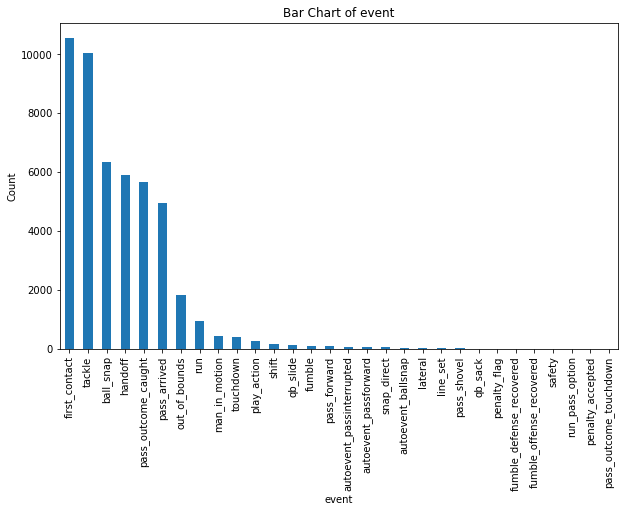

In [92]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
bc_event["event"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of event')
plt.xlabel("event")
plt.ylabel('Count')
plt.show()

Anytime, pass_outcome_caught shows up in our data, we label this play as pass. Anytime there is a handoff, we will label this as run. Anytime there is a run, we will label this as QB_Run. Any other play will be labeled as other.

# How many frames are still being recorded after a tackle is recorded?

In [ ]:
#Grab only the frames with unique description for each frame in a play
unique_frames =tracking[["gameId","playId",'frameId',"event"]].drop_duplicates()

# Filter the data to include only rows where the event is "tackle"
tackle_data = unique_frames[unique_frames['event'] == 'tackle']

# Extract unique gameId and playId combinations where tackle occurred
game_play_subset = tackle_data[['gameId', 'playId']].drop_duplicates()

# Subset the original DataFrame to include all rows with the gameId and playId values from the subset
subset_data = unique_frames[unique_frames[['gameId', 'playId']].apply(tuple, axis=1).isin(game_play_subset.apply(tuple, axis=1))]

display(subset_data)

In [ ]:
#Iterate through data frame to obtain a list of number of frames after a tackle is recorded for each play
num_frames_after_tackle_list = []
num_frames_after_tackle = 0
tackle_found = False
cur_playId = None
for index, row in subset_data.iterrows():
    if cur_playId == row["playId"]:
        if tackle_found:
            num_frames_after_tackle += 1
        if row['event'] == "tackle":
            tackle_found = True
    else:
        cur_playId = row["playId"]
        tackle_found = False
        num_frames_after_tackle_list.append(num_frames_after_tackle)
        num_frames_after_tackle = 0
print(sum(num_frames_after_tackle_list)/len(num_frames_after_tackle_list))     
print(min(num_frames_after_tackle_list))

In [ ]:
#Print frequency
from collections import Counter

# Create a Counter object to count the occurrences of each element
frequency_table = Counter(num_frames_after_tackle_list)

# Print the frequency table
for element, frequency in frequency_table.items():
    print(f"{element}: {frequency}")

In [ ]:
# Plot histogram
plt.hist(num_frames_after_tackle_list, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of List')
plt.grid(True)
plt.show()